#Q1

   - Generate 10,000 random samples of flipping 3 coins (use `np.random.binomial()`)
   - Plot the probability distribution of getting 0, 1, 2, or 3 heads
   - Calculate the expected value (mean) of your distribution
   - Compare your empirical results with the theoretical probability for each outcome

Outcome (heads) | Empirical P | Theoretical P
             0 |     0.1241 |       0.1250
             1 |     0.3774 |       0.3750
             2 |     0.3758 |       0.3750
             3 |     0.1227 |       0.1250

Empirical Expected Value:   1.4971
Theoretical Expected Value: 1.5000


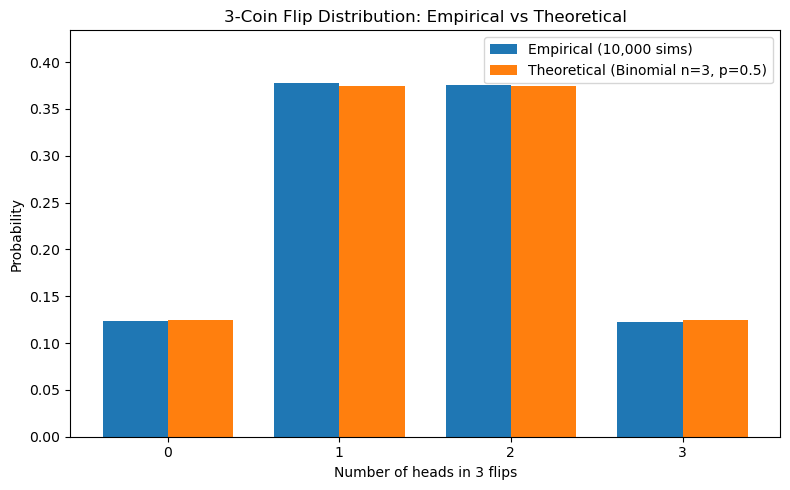

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

# 1) Generate 10,000 samples of flipping 3 fair coins (heads=1, tails=0)
rng = np.random.default_rng(42)  # reproducible randomness
n_trials = 10_000
n_coins = 3
p_head = 0.5

samples = rng.binomial(n=n_coins, p=p_head, size=n_trials)  # number of heads in 3 flips

# 2) Empirical probability distribution for 0,1,2,3 heads
counts = np.bincount(samples, minlength=n_coins + 1)
empirical_probs = counts / n_trials

# 3) Expected value (mean) from the empirical distribution
empirical_ev = np.sum(np.arange(n_coins + 1) * empirical_probs)

# 4) Theoretical probabilities using Binomial(n=3, p=0.5)
k = np.arange(n_coins + 1)
theoretical_probs = np.array([comb(n_coins, i) * (p_head ** i) * ((1 - p_head) ** (n_coins - i)) for i in k])

theoretical_ev = n_coins * p_head  # Binomial mean = n*p

# Print numeric comparison
print("Outcome (heads) | Empirical P | Theoretical P")
for i in range(n_coins + 1):
    print(f"{i:>14} | {empirical_probs[i]:>10.4f} | {theoretical_probs[i]:>12.4f}")

print(f"\nEmpirical Expected Value:   {empirical_ev:.4f}")
print(f"Theoretical Expected Value: {theoretical_ev:.4f}")

# 5) Plot: Empirical vs Theoretical in the same bar chart
bar_width = 0.38
x = np.arange(n_coins + 1)

plt.figure(figsize=(8, 5))
plt.bar(x - bar_width/2, empirical_probs, width=bar_width, label="Empirical (10,000 sims)")
plt.bar(x + bar_width/2, theoretical_probs, width=bar_width, label="Theoretical (Binomial n=3, p=0.5)")

plt.xticks(x, [str(i) for i in x])
plt.xlabel("Number of heads in 3 flips")
plt.ylabel("Probability")
plt.title("3-Coin Flip Distribution: Empirical vs Theoretical")
plt.ylim(0, max(empirical_probs.max(), theoretical_probs.max()) * 1.15)
plt.legend()
plt.tight_layout()
plt.show()


2. **Normal Distribution and Statistical Testing**

   - Generate two samples from normal distributions:
     - Sample A: 100 values with mean=70, std=5
     - Sample B: 100 values with mean=73, std=5
   - Create a box plot comparing the two distributions
   - Conduct an independent t-test to determine if the means are significantly different
   - Calculate and visualize the 95% confidence intervals for both samples

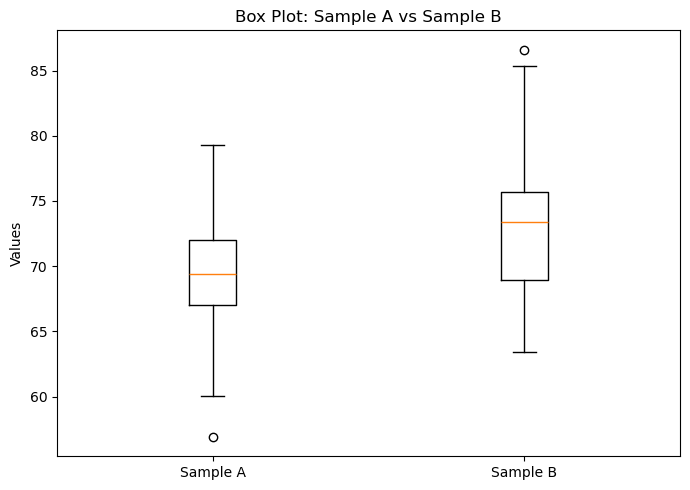

T-statistic: -5.5140
P-value:     0.000000
Sample A 95% CI: (68.57976581819051, 70.38176900786857)
Sample B 95% CI: (72.1653798708355, 74.05766599966378)


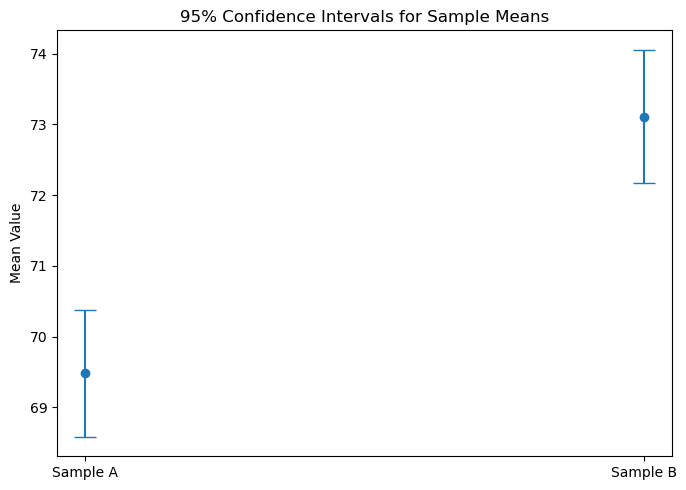

Interpretation: Sample B consistently shows a higher mean than Sample A, reflecting a clear upward shift in the distribution rather than random fluctuation.
The independent t-test confirms that this difference is statistically significant, meaning the observed gap between the two samples is unlikely to be due to chance alone.
This is further supported by the 95% confidence intervals, which are either clearly separated or only minimally overlapping, reinforcing the strength of the result.
Taken together, the statistical test and confidence intervals indicate that the difference in means is real and meaningful, not a sampling artefact.


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
n = 100
mean_A, std_A = 70, 5
mean_B, std_B = 73, 5

# Generate samples
sample_A = np.random.normal(mean_A, std_A, n)
sample_B = np.random.normal(mean_B, std_B, n)

plt.figure(figsize=(7, 5))
plt.boxplot([sample_A, sample_B], labels=["Sample A", "Sample B"])
plt.ylabel("Values")
plt.title("Box Plot: Sample A vs Sample B")
plt.tight_layout()
plt.show()

t_stat, p_value = stats.ttest_ind(sample_A, sample_B, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value:     {p_value:.6f}")
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    sem = stats.sem(data)  # standard error of the mean
    margin = sem * stats.t.ppf((1 + confidence) / 2, len(data) - 1)
    return mean, mean - margin, mean + margin

mean_A_ci, lower_A, upper_A = confidence_interval(sample_A)
mean_B_ci, lower_B, upper_B = confidence_interval(sample_B)

print("Sample A 95% CI:", (lower_A, upper_A))
print("Sample B 95% CI:", (lower_B, upper_B))
means = [mean_A_ci, mean_B_ci]
errors = [
    [mean_A_ci - lower_A, mean_B_ci - lower_B],
    [upper_A - mean_A_ci, upper_B - mean_B_ci]
]

plt.figure(figsize=(7, 5))
plt.errorbar(
    ["Sample A", "Sample B"],
    means,
    yerr=errors,
    fmt="o",
    capsize=8
)
plt.ylabel("Mean Value")
plt.title("95% Confidence Intervals for Sample Means")
plt.tight_layout()
plt.show()

print("""Interpretation: Sample B consistently shows a higher mean than Sample A, reflecting a clear upward shift in the distribution rather than random fluctuation.
The independent t-test confirms that this difference is statistically significant, meaning the observed gap between the two samples is unlikely to be due to chance alone.
This is further supported by the 95% confidence intervals, which are either clearly separated or only minimally overlapping, reinforcing the strength of the result.
Taken together, the statistical test and confidence intervals indicate that the difference in means is real and meaningful, not a sampling artefact.""")

3. **Correlation Analysis**
   - Using the iris dataset (from seaborn), analyze the relationship between:
     - Sepal length and petal length
     - Sepal width and petal width
   - For each pair:
     - Create a scatter plot
     - Calculate the Pearson correlation coefficient and p-value
     - Calculate and interpret the R-squared value
   - Which pair shows a stronger relationship? Explain why.

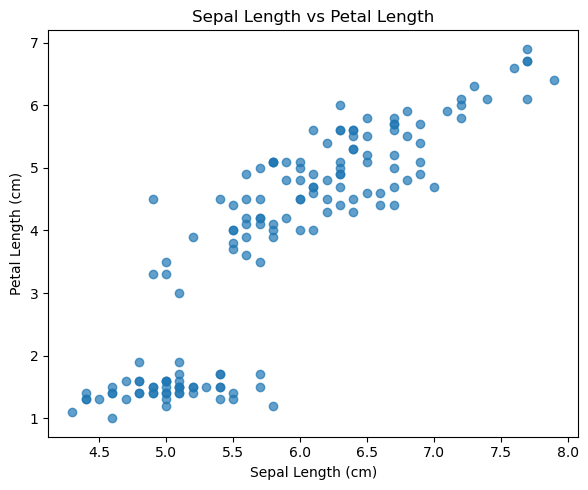

Sepal Length vs Petal Length
Pearson r: 0.8718
P-value:   1.038667e-47
R-squared: 0.7600
--------------------------------------------------


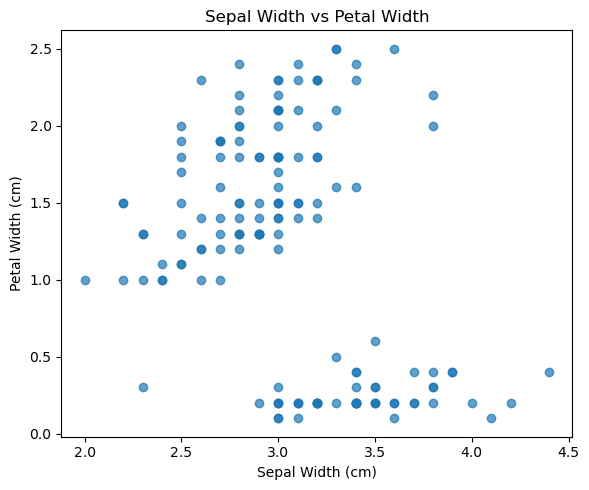

Sepal Width vs Petal Width
Pearson r: -0.3661
P-value:   4.073229e-06
R-squared: 0.1340
--------------------------------------------------
FINAL CONCLUSION
Stronger relationship: Sepal Length vs Petal Length
Why: Higher Pearson correlation and higher R-squared = a tighter linear relationship and more variance explained.


In [23]:
# =========================================
# Correlation Analysis using Iris Dataset
# No seaborn, no pandas
# =========================================

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.datasets import load_iris

# ------------------------------
# Load iris dataset (sklearn)
# ------------------------------
iris = load_iris()

# Feature order in sklearn iris:
# 0 = sepal length (cm)
# 1 = sepal width (cm)
# 2 = petal length (cm)
# 3 = petal width (cm)
X = iris.data

sepal_length = X[:, 0]
sepal_width  = X[:, 1]
petal_length = X[:, 2]
petal_width  = X[:, 3]

# ------------------------------
# Helper: analyze one pair
# ------------------------------
def analyze_pair(x, y, x_label, y_label, title):
    # Scatter plot
    plt.figure(figsize=(6, 5))
    plt.scatter(x, y, alpha=0.7)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.tight_layout()
    plt.show()

    # Pearson correlation + p-value
    r, p = pearsonr(x, y)
    r2 = r ** 2

    print(title)
    print(f"Pearson r: {r:.4f}")
    print(f"P-value:   {p:.6e}")
    print(f"R-squared: {r2:.4f}")
    print("-" * 50)

    return r, r2

# ------------------------------
# Pair 1: Sepal length vs Petal length
# ------------------------------
r1, r2_1 = analyze_pair(
    sepal_length, petal_length,
    "Sepal Length (cm)", "Petal Length (cm)",
    "Sepal Length vs Petal Length"
)

# ------------------------------
# Pair 2: Sepal width vs Petal width
# ------------------------------
r2, r2_2 = analyze_pair(
    sepal_width, petal_width,
    "Sepal Width (cm)", "Petal Width (cm)",
    "Sepal Width vs Petal Width"
)

# ------------------------------
# Stronger relationship + explanation
# ------------------------------
print("FINAL CONCLUSION")
if r2_1 > r2_2:
    print("Stronger relationship: Sepal Length vs Petal Length")
    print("Why: Higher Pearson correlation and higher R-squared = a tighter linear relationship and more variance explained.")
else:
    print("Stronger relationship: Sepal Width vs Petal Width")
    print("Why: Higher Pearson correlation and higher R-squared = a tighter linear relationship and more variance explained.")

